In [1]:
from constants import Constants
from podworld import PodWorld
from podutil import SimpleController


world = PodWorld()
world.add_player(SimpleController())

str(world)

"['(1594.0, 3862.0)', '(8937.0, 4106.0)', '(6202.0, 2231.0)', '(12677.0, 4725.0)']\n['Pod pos=(12677.0, 4725.0) vel=(0.0, 0.0) angle=0.0 laps=0']"

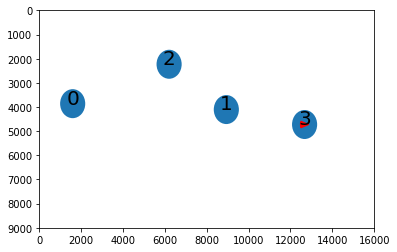

In [2]:
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Circle, Wedge
from vec2 import Vec2

fig = plt.figure()
ax = plt.axes(xlim=(0, Constants.world_x()), ylim=(0, Constants.world_y()))
ax.invert_yaxis()

# ------------------------------------ Checkpoints
for (idx, check) in enumerate(world.checkpoints):
    circle = Circle((check.x, check.y), Constants.check_radius())
    ax.add_artist(circle)
    ax.annotate(str(idx), xy=(check.x, check.y), fontsize=20, ha="center")

# ------------------------------------ Pods
for (idx, player) in enumerate(world.players):
    pod = player.pod
    angleDeg = math.degrees(pod.angle) + 180.0
    offset = Vec2(Constants.pod_radius() / 2, 0).rotate(math.radians(angleDeg))
    center = pod.pos - offset
    wedge = Wedge((center.x, center.y), Constants.pod_radius(), angleDeg - 20, angleDeg + 20, color = "red")
    ax.add_artist(wedge)

# ------------------------------------ Parameters
plt.rcParams['figure.figsize'] = [Constants.world_x() / 1000, Constants.world_y() / 1000]
plt.rcParams['figure.dpi'] = 100

plt.show()

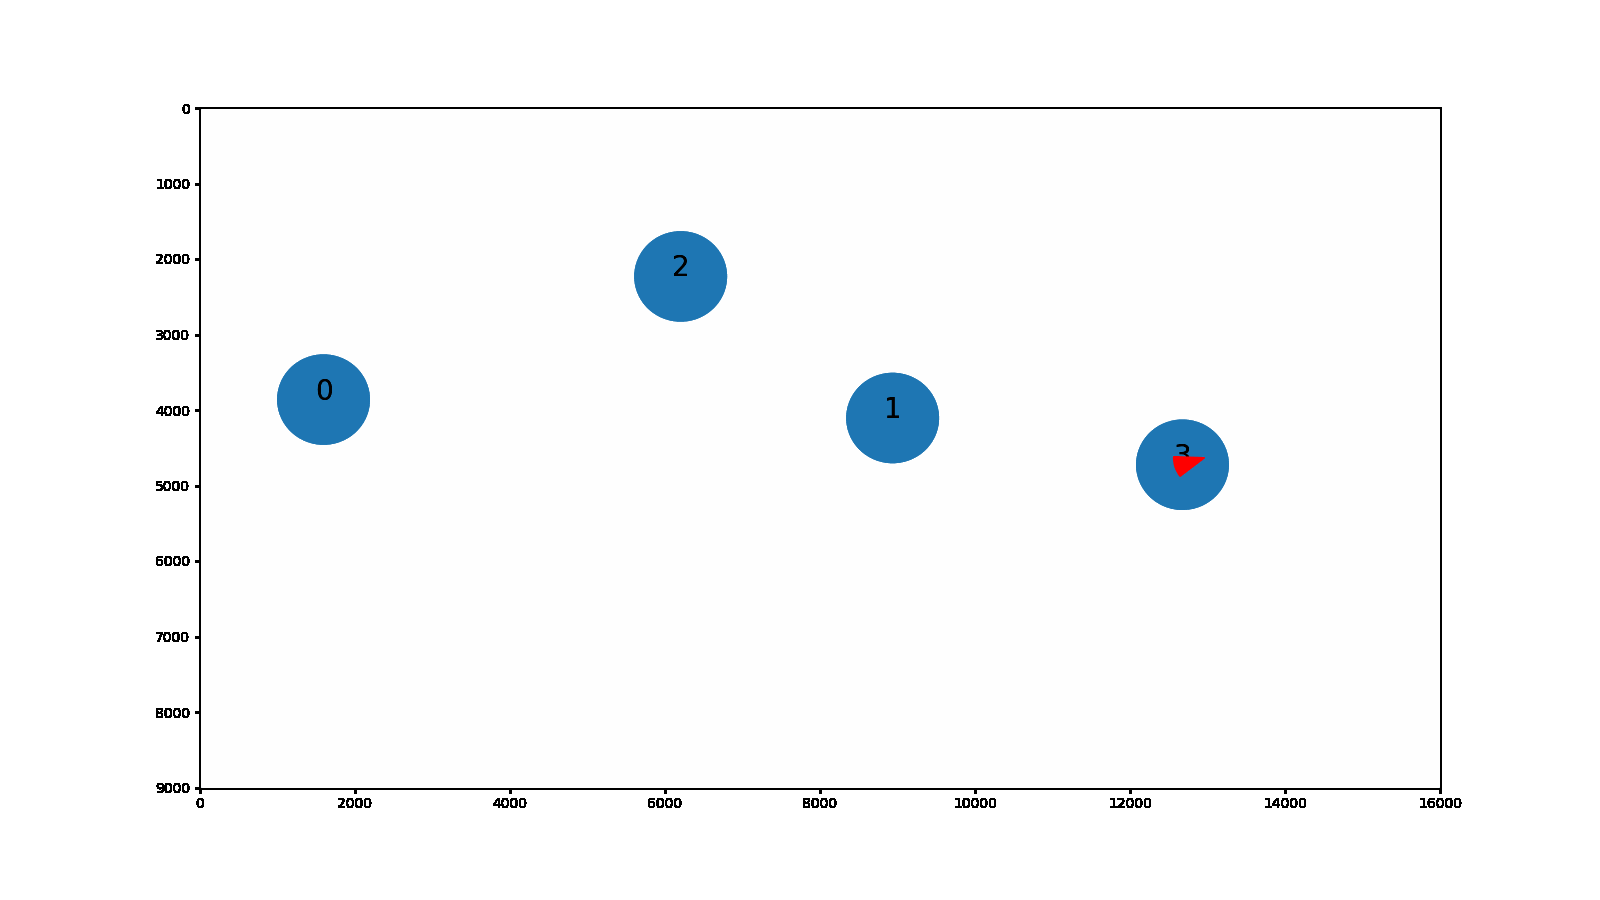

In [3]:
from drawer import Drawer
from IPython.display import HTML
from matplotlib.animation import PillowWriter

d = Drawer(world)
anim = d.animate()
anim.save('/tf/notebooks/pods.gif', writer = PillowWriter(fps=10))

from IPython.display import Image
Image(filename = '/tf/notebooks/pods.gif')